In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

import pandas as pd
import numpy as np
from pathlib import Path

In [15]:
# Data loading
file_path = Path("crypto_data.csv")
df_crypto = pd.read_csv(file_path)
df_crypto.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [16]:
# Find duplicate entries
print(f"Duplicate entries: {df_crypto.duplicated().sum()}")

Duplicate entries: 0


In [17]:
# Find null values
for column in df_crypto.columns:
    print(f"Column {column} has {df_crypto[column].isnull().sum()} null values")

Column Unnamed: 0 has 0 null values
Column CoinName has 0 null values
Column Algorithm has 0 null values
Column IsTrading has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 508 null values
Column TotalCoinSupply has 0 null values


In [18]:
# Remove not traded and null
df_crypto[df_crypto.IsTrading != 'False']
df_crypto = df_crypto.dropna()
df_crypto=df_crypto.drop(columns=['IsTrading','Unnamed: 0','CoinName'])
df_crypto

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
4,SHA-256,PoW/PoS,0.000000e+00,0
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000
1247,Scrypt,PoS,1.283270e+05,1000000


In [19]:
# Find null values
for column in df_crypto.columns:
    print(f"Column {column} has {df_crypto[column].isnull().sum()} null values")

Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 0 null values
Column TotalCoinSupply has 0 null values


In [20]:
df_crypto.head(108)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
4,SHA-256,PoW/PoS,0.000000e+00,0
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...
162,Scrypt,PoW,2.421518e+07,250000000
165,X15,PoW/PoS,0.000000e+00,1000000
166,Scrypt,PoW/PoS,0.000000e+00,1000000
168,Scrypt,PoW,2.559374e+07,51200000


In [21]:
# to convert the remaining features with text values
dummies = pd.get_dummies(data=df_crypto, columns=['Algorithm', 'ProofType'])
dummies.head()
dummies.shape

# Standardizing data
df_scaled = StandardScaler().fit_transform(dummies)
df_scaled

array([[-0.10047714, -0.03668886, -0.03668644, ..., -0.03668644,
        -0.03668644, -0.03668644],
       [-0.07317373, -0.0366887 , -0.03668644, ..., -0.03668644,
        -0.03668644, -0.03668644],
       [-0.10047714, -0.03668886, -0.03668644, ..., -0.03668644,
        -0.03668644, -0.03668644],
       ...,
       [-0.10028834, -0.03668885, -0.03668644, ..., -0.03668644,
        -0.03668644, -0.03668644],
       [-0.10047382, -0.03668886, -0.03668644, ..., -0.03668644,
        -0.03668644, -0.03668644],
       [-0.09992104, -0.03668883, -0.03668644, ..., -0.03668644,
        -0.03668644, -0.03668644]])

In [22]:
# Initialize PCA model
pca = PCA(n_components=.9)
# Transform PCA data to a DataFrame
c_pca = pca.fit_transform(df_scaled)

# Fetch the explained variance
pca.explained_variance_ratio_

array([0.01971841, 0.01856098, 0.01778158, 0.01772294, 0.01772294,
       0.01772294, 0.01772294, 0.01772294, 0.01768814, 0.01554653,
       0.01513182, 0.01416038, 0.01398333, 0.01280794, 0.01273195,
       0.01240069, 0.01170192, 0.01090831, 0.01059317, 0.01015801,
       0.00957237, 0.00910587, 0.00907383, 0.00904121, 0.00899759,
       0.00897878, 0.00896468, 0.00893976, 0.00892175, 0.00892095,
       0.00891664, 0.00891493, 0.00890889, 0.00890425, 0.00889998,
       0.00889739, 0.00889691, 0.00889266, 0.00888714, 0.00888539,
       0.00888539, 0.00888286, 0.00887929, 0.00887799, 0.00887698,
       0.00887603, 0.00887382, 0.00887341, 0.00887341, 0.00887341,
       0.00887267, 0.0088702 , 0.00886719, 0.00886147, 0.00886147,
       0.00886147, 0.00886147, 0.00886147, 0.00886147, 0.00886147,
       0.00886147, 0.00886147, 0.00886147, 0.00886147, 0.00886147,
       0.00886147, 0.00886147, 0.00886147, 0.00886147, 0.00886147,
       0.00886147, 0.00886147, 0.00886147, 0.00886147, 0.00886

In [23]:
# Initialize t-SNE model
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=100,random_state=13)

# Reduce dimensions
tsne_features = tsne.fit_transform(df_scaled)

tsne_features.shape

(744, 2)

In [24]:
tsne_features

array([[ 15.936759 , -12.456148 ],
       [ 17.812193 ,  -7.5477014],
       [-26.371235 ,  12.973386 ],
       ...,
       [-12.352564 , -27.336775 ],
       [ -4.151967 ,  12.869517 ],
       [ 19.535711 , -12.055344 ]], dtype=float32)

In [25]:
tsne_features.shape

(744, 2)

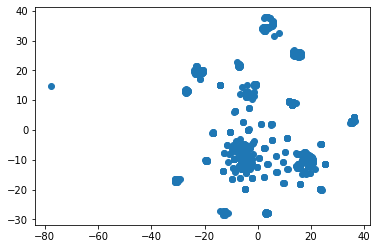

In [27]:
import matplotlib.pyplot as plt
plt.scatter(tsne_features[:, 0], tsne_features[:,1])
plt.show()

In [29]:
# Cluster analysis with KMeans. Perform KMeans to find the best value for k
from sklearn.cluster import KMeans

inertia = []
k = [1,2,3,4,5,6,7,8,9,10]

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Create the Elbow Curve 
elbow_data = {"k": k, "inertia": inertia}

df_elbow = pd.DataFrame(elbow_data)
df_elbow.head(10)

C:\Users\walla\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,394859.750000
1,2,222980.468750
2,3,130868.718750
3,4,91252.000000
4,5,73508.218750
5,6,57512.097656
6,7,46691.238281
7,8,36453.492188
8,9,30038.492188
9,10,25231.519531


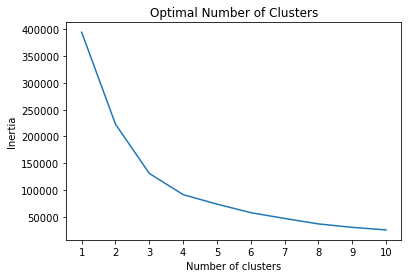

In [36]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.title('Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [32]:
# Initialize the k-means model. 
# Use K number = 5 as it looks like the elbow of the curve.
model = KMeans(n_clusters=5, random_state=0)
model.fit(tsne_features)

KMeans(n_clusters=5, random_state=0)

In [33]:
# Predict clusters
predictions = model.predict(tsne_features)
predictions

array([2, 2, 4, 2, 4, 0, 0, 1, 0, 0, 0, 3, 0, 4, 1, 4, 0, 2, 1, 4, 2, 2,
       3, 0, 2, 4, 2, 0, 0, 4, 0, 0, 2, 3, 2, 0, 1, 2, 0, 2, 0, 2, 0, 0,
       3, 1, 0, 4, 2, 0, 1, 0, 4, 0, 0, 0, 0, 0, 3, 0, 3, 2, 4, 0, 0, 0,
       0, 0, 0, 1, 2, 2, 0, 3, 0, 1, 4, 1, 2, 0, 0, 0, 0, 1, 2, 0, 0, 3,
       0, 4, 3, 2, 4, 0, 4, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 3,
       1, 4, 0, 4, 2, 1, 4, 4, 4, 4, 1, 2, 2, 2, 0, 1, 0, 0, 0, 2, 1, 0,
       4, 2, 2, 2, 0, 0, 0, 3, 0, 4, 4, 3, 2, 0, 3, 0, 2, 0, 3, 0, 4, 2,
       2, 2, 0, 1, 0, 0, 3, 0, 2, 2, 0, 2, 2, 0, 4, 0, 0, 1, 0, 4, 0, 2,
       1, 1, 2, 1, 2, 0, 4, 2, 1, 3, 3, 1, 0, 0, 3, 0, 3, 2, 0, 4, 2, 2,
       1, 4, 2, 0, 0, 0, 4, 1, 0, 0, 4, 3, 4, 2, 0, 2, 2, 4, 1, 3, 0, 1,
       0, 0, 0, 4, 0, 0, 1, 4, 3, 4, 0, 3, 0, 0, 1, 1, 1, 1, 3, 4, 4, 4,
       2, 2, 1, 2, 2, 2, 0, 3, 2, 2, 2, 2, 1, 3, 0, 1, 3, 2, 0, 4, 4, 1,
       2, 0, 2, 0, 1, 3, 4, 0, 0, 2, 3, 2, 0, 1, 0, 0, 4, 3, 2, 3, 2, 3,
       2, 0, 4, 0, 3, 1, 2, 0, 0, 1, 2, 1, 3, 2, 2,

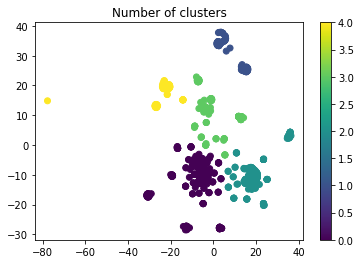

In [37]:
# Plot the reduced dimensions from tsne and colorcode them with the labels
plt.scatter(tsne_features[:, 0], tsne_features[:,1], c = model.labels_ )
plt.title('Number of clusters')
plt.colorbar()
plt.show()

# Using the elbow method, determining the optimal model/cluster is not possible.  No elbow is found, point where the decrease in inertia begins to slow.